In [7]:
from sklearn import preprocessing
import pandas as pd
from sklearn.linear_model import LinearRegression
import requests
import pandas as pd
import numpy as np
import indicators as ind
from backtester import Backtest


In [28]:

PARAMS = {"backtest": "all"}
df = requests.get(
    "https://aipricepatterns.com/api/api/backtest", params=PARAMS)
data.rename({'close': 'Close'})
data = df.json()['backtest']
data = pd.DataFrame(data)
data = data.set_index('Time')
data.index = pd.to_datetime(data.index)
data['hours'] = data.index.hour
data['minutes'] = data.index.minute
data['dayofweek'] = data.index.dayofweek
print(data.head(1))

                              Close  Cumsum     High  Lag  Lag_short  \
Time                                                                   
2020-11-12 01:00:00+00:00  15609.36     0.0  15640.0    0          0   

                                Low     Open  Results Rule Rule_short  Signal  \
Time                                                                            
2020-11-12 01:00:00+00:00  15600.65  15635.5      0.0   no         no       0   

                           Signal_short  Volume  hours  minutes  dayofweek  
Time                                                                        
2020-11-12 01:00:00+00:00             0     0.0      1        0          3  


In [31]:
data = data.rename(columns={'Close': 'close'})

In [32]:
class Strategies:

    @staticmethod
    def momentum(df, seq):
        signals = np.zeros(len(df))
        cons_day = 0
        for k in range(1, len(df)):
            price = df[k]
            prior_price = df[k-1]
            if price > prior_price:
                if cons_day < 0:
                    cons_day = 0
                cons_day += 1
            if price < prior_price:
                if cons_day > 0:
                    cons_day = 0
                cons_day -= 1
            if cons_day == seq:
                signals[k] = 1
            if cons_day == -seq:
                signals[k] = -1
        return signals


In [35]:
# Test seq [1, 2, 3 ,4, 5, 6, 7]
data['signal'] = Strategies.momentum(data.close.values, seq=2)

In [37]:
back = Backtest()
returns = back.exit_by_take(data=data, take_profit=0.005, stop_loss=-0.02, comission=0)

<AxesSubplot:xlabel='Time'>

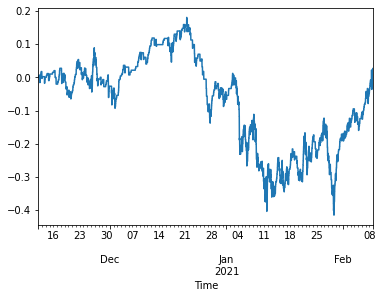

In [38]:
returns['cumsum'].plot()

# Test parameterts
## Find seq [1, 2, 3, 4, 5, 6, 7]
## Test take profit [0.005, 0.01, 0.015, 0.002]
## Test stop loss [-0.005, -0.01, -0.015, -0.002]
## Test type of backtest: exit_by_signal, exit_by_take, exit_by_lag
## Test calendar statistic (what day?, what hours?, what minutes?)


<AxesSubplot:xlabel='Time'>

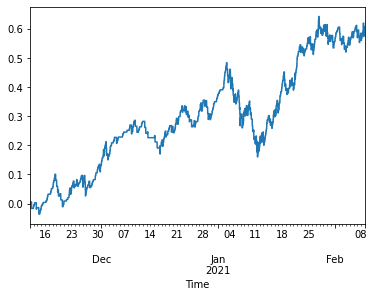

In [43]:
## Test take seq [1, 2, 3, 4, 5, 6, 7]
### Describe what you find
data['signal'] = Strategies.momentum(data.close.values, seq=4)
back = Backtest()
returns = back.exit_by_take(data=data, take_profit=0.005, stop_loss=-0.02, comission=0)
returns['cumsum'].plot()



<AxesSubplot:xlabel='Time'>

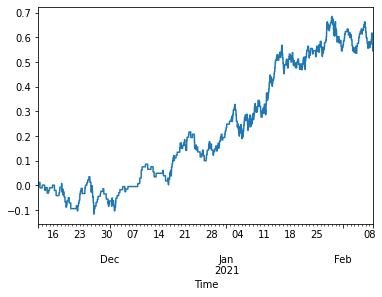

In [47]:
## Test take take_profit 0.005, 0.01, 0.015, 0.002
### Describe what you find
data['signal'] = Strategies.momentum(data.close.values, seq=4)
back = Backtest()
returns = back.exit_by_take(data=data, take_profit=0.01, stop_loss=-0.02, comission=0)
returns['cumsum'].plot()



<AxesSubplot:xlabel='Time'>

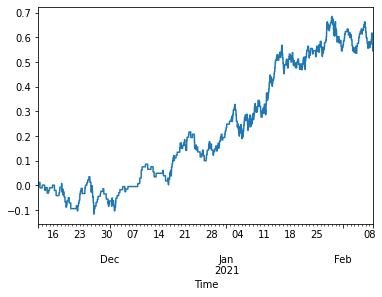

In [55]:
## Test take stop loss [-0.005, -0.01, -0.015, -0.002]
### Describe what you find
data['signal'] = Strategies.momentum(data.close.values, seq=4)
back = Backtest()
returns = back.exit_by_take(data=data, take_profit=0.01, stop_loss=-0.02, comission=0)
returns['cumsum'].plot()


<AxesSubplot:xlabel='Time'>

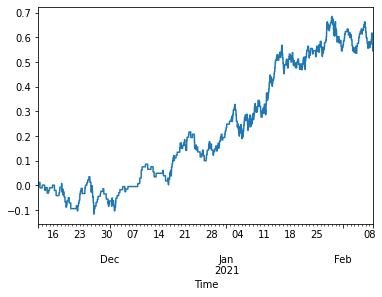

In [65]:
## Test type of backtest 
### Describe what you find exit_by_signal, exit_by_take, exit_by_lag
data['signal'] = Strategies.momentum(data.close.values, seq=4)
back = Backtest()
# returns = back.exit_by_lag(data=data, take_profit=0.01, stop_loss=-0.02, lag=25, comission=0)
# returns = back.exit_by_signal(data=data, take_profit=0.01, stop_loss=-0.02, comission=0)
returns = back.exit_by_take(data=data, take_profit=0.01, stop_loss=-0.02, comission=0)

returns['cumsum'].plot()


<AxesSubplot:xlabel='Time'>

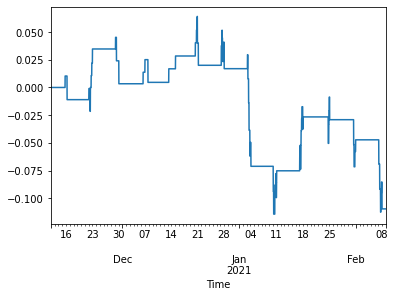

In [72]:
## Test calendar statistic (what day?)
## Describe
'''
0 - Sunday
1 - Monday
'''
data['signal'] = Strategies.momentum(data.close.values, seq=4)
data['signal'] = np.where(data['dayofweek'] == 6, data['signal'], 0)
back = Backtest()
returns = back.exit_by_take(data=data, take_profit=0.01, stop_loss=-0.02, comission=0)
returns['cumsum'].plot()






<AxesSubplot:xlabel='Time'>

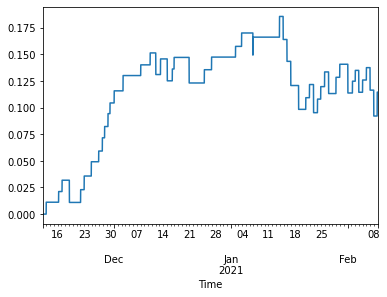

In [79]:
## Test calendar statistic (what hours?)
'''
GMT time - 0. Green witch 

'''
data['signal'] = Strategies.momentum(data.close.values, seq=4)
data['signal'] = np.where(data['hours'] == 20, data['signal'], 0)
back = Backtest()
returns = back.exit_by_take(data=data, take_profit=0.01, stop_loss=-0.02, comission=0)
returns['cumsum'].plot()



<AxesSubplot:xlabel='Time'>

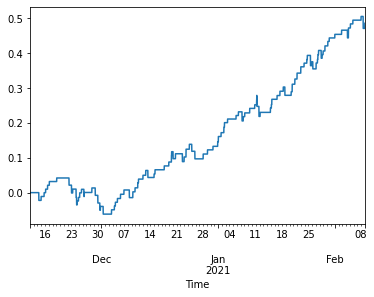

In [84]:
## Test calendar statistic (what minutes?)
'''
GMT time - 0. Green witch 

'''
data['signal'] = Strategies.momentum(data.close.values, seq=4)
data['signal'] = np.where(data['minutes'] == 50, data['signal'], 0)
back = Backtest()
returns = back.exit_by_take(data=data, take_profit=0.01, stop_loss=-0.02, comission=0)
returns['cumsum'].plot()

